# PACKAGES AND LOADING

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
from matplotlib import pyplot

data = pd.read_csv('C:\\Users\\A\\Desktop\\covid_vaccine\\data\\data.csv', delimiter = ';')
data = pd.DataFrame(data)
data

,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,AGE_YRS,SEX,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,RECOVD,NUMDAYS,V_ADMINBY,OFC_VISIT,ER_ED_VISIT
0,MODERNA,1,IM,LA,"(32,38]",F,0,0,0,0,1,2,PVT,1,0
1,MODERNA,1,IM,RA,"(72,119]",F,0,0,0,0,1,0,SEN,1,0
2,MODERNA,OT,OT,OT,"(54,60]",F,0,0,0,0,1,0,WRK,0,0
3,MODERNA,1,IM,LA,"(43,49]",F,0,0,0,0,0,4-7,PUB,0,0
4,MODERNA,1,IM,LA,"(43,49]",F,0,0,0,0,1,0,PVT,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111494,PFIZER\BIONTECH,1,SYR,LA,"(49,54]",M,0,0,0,1,0,1,MIL,1,0
111495,PFIZER\BIONTECH,2,SYR,LA,"(49,54]",M,0,0,0,1,0,1,MIL,1,0
111496,PFIZER\BIONTECH,2,IM,OT,"(38,43]",M,0,0,0,0,0,0,PHM,0,1
111497,PFIZER\BIONTECH,2,IM,RA,"(72,119]",F,0,1,4,0,0,30+,SEN,0,0


# RECODING

In [4]:
data['RECOVD'] = np.where(data['RECOVD'] == 1, "TAK", "NIE")
data['VAX_MANU'] = np.where(data['VAX_MANU'] == 'UNKNOWN', 'NIEZNANY', 
                            np.where(data['VAX_MANU'] == 'PFIZER\BIONTECH', 'PFIZER\BIONTECH',
                                     np.where(data['VAX_MANU'] == 'MODERNA', 'MODERNA', 'JANSSEN')))
data['SEX'] = np.where(data['SEX'] == "M", "MĘŻCZYZNA", np.where(data['SEX'] == "F", "KOBIETA", "NIEZNANA"))
data['VAX_DOSE_SERIES'] = np.where(data['VAX_DOSE_SERIES'] == "OT", "INNA", 
                                   np.where(data['VAX_DOSE_SERIES'] == "1", "1","2"))
data['VAX_ROUTE'] = np.where(data['VAX_ROUTE'] == "IM", "DOMIĘŚNIOWO", 
                             np.where(data['VAX_ROUTE'] == "SYR", "STRZYKAWKA I IGŁA","INNY"))
data['VAX_SITE'] = np.where(data['VAX_SITE'] == 'RA', "PRAWE RAMIĘ",
                           np.where(data['VAX_SITE'] == 'LA', "LEWE RAMIĘ", "INNE"))
data['AGE_YRS'][(data.AGE_YRS == "[0.08,26]")] = "(0,26]"
data['L_THREAT'] = np.where(data['L_THREAT'] == 1, "TAK", "NIE")
data['HOSPITAL'] = np.where(data['HOSPITAL'] == 1, "TAK", "NIE")
data['DISABLE'] = np.where(data['DISABLE'] == 1, "TAK", "NIE")
data['V_ADMINBY'] = np.where(data['V_ADMINBY'] == 'PUB', 'PUBLICZNE',
                            np.where(data['V_ADMINBY'] == 'PVT', 'PRYWATNE',
                                np.where(data['V_ADMINBY'] == 'MIL', 'WOJSKOWE',
                                        np.where(data['V_ADMINBY'] == 'PHM', 'APTECZNE',
                                                np.where(data['V_ADMINBY'] == 'SCH', 'SZKOLNE',
                                                        np.where(data['V_ADMINBY'] == 'SEN', 'DOMY OPIEKI',
                                                                np.where(data['V_ADMINBY'] == 'WRK', 'ZAKŁADY PRACY',
                                                                        np.where(data['V_ADMINBY'] == 'OTH', "INNE", "NIEZNANE"))))))))
data['OFC_VISIT'] = np.where(data['OFC_VISIT'] == 1, "TAK", "NIE")
data['ER_ED_VISIT'] = np.where(data['ER_ED_VISIT'] == 1, "TAK", "NIE")
data['HOSPDAYS'] = np.where(data['HOSPDAYS'] == 0, 0,
                           np.where((data['HOSPDAYS'] >= 1) & (data['HOSPDAYS'] <= 2), "1-2", 
                                   np.where((data['HOSPDAYS'] >= 3) & (data['HOSPDAYS'] <= 7), "3-7",
                                           np.where((data['HOSPDAYS'] >= 8) & (data['HOSPDAYS'] <= 14), "8-14",
                                                    np.where((data['HOSPDAYS'] >= 15) & (data['HOSPDAYS'] <= 30), "15-30","31+")))))



D:\Programy\Anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


# RECOVD

Text(0.5, 1.0, 'Powrót do zdrowia pacjenta')

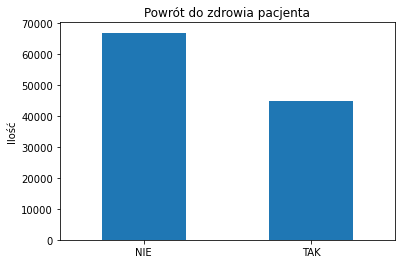

In [3]:
recovd_counts = data['RECOVD'].value_counts()
recovd_counts.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Ilość')
plt.title('Powrót do zdrowia pacjenta')

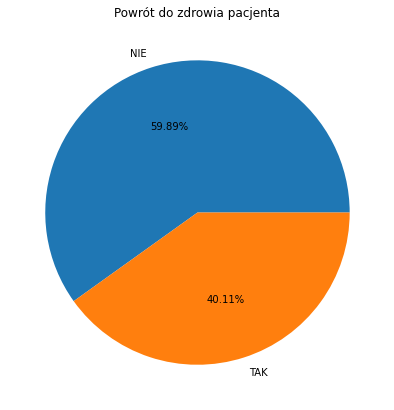

In [4]:
plt.pie(recovd_counts, labels=recovd_counts.index, autopct='%1.2f%%')
plt.title('Powrót do zdrowia pacjenta')
fig = plt.gcf()
fig.set_size_inches(7,7)

# VAX_MANU

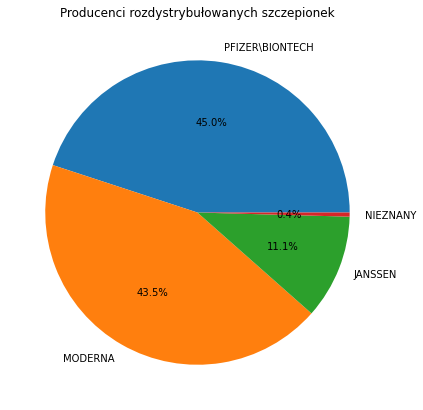

In [5]:
vax_manu_counts = data['VAX_MANU'].value_counts()
plt.pie(vax_manu_counts, labels=vax_manu_counts.index, autopct='%1.1f%%')
plt.title('Producenci rozdystrybułowanych szczepionek')
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

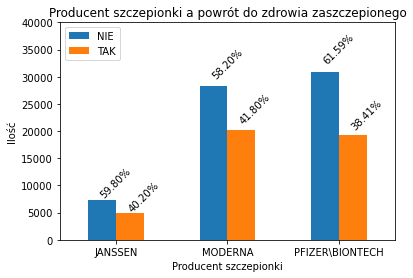

In [6]:
vax_manu_aggr = data[(data.VAX_MANU != "NIEZNANY")]
vax_manu_aggr= vax_manu_aggr.groupby(['VAX_MANU','RECOVD'])['VAX_MANU'].agg(Frequency='count')
vax_manu_aggr["Percentage"] = vax_manu_aggr / vax_manu_aggr.groupby(level=0).sum()
vax_manu_aggr["Percentage"] = round(vax_manu_aggr["Percentage"] * 100,2)
vax_manu_aggr = vax_manu_aggr.sort_values('RECOVD')

ax = vax_manu_aggr.Frequency.unstack().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('Producent szczepionki')
plt.ylabel('Ilość')
plt.title('Producent szczepionki a powrót do zdrowia zaszczepionego')
plt.legend(loc=2)
axes = plt.gca()
axes.set_ylim([0,40000])

vax_manu_percentage = vax_manu_aggr["Percentage"]
vax_manu_percentage = vax_manu_percentage.tolist()
patches = ax.patches    
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   width = patches[i].get_width()
   height = patches[i].get_height()
   ax.annotate('{:.2f}%'.format(vax_manu_aggr["Percentage"][i]), (x+ width/2, y + height*0.05), ha='center', rotation=45)

# VAX_DOSE_SERIES

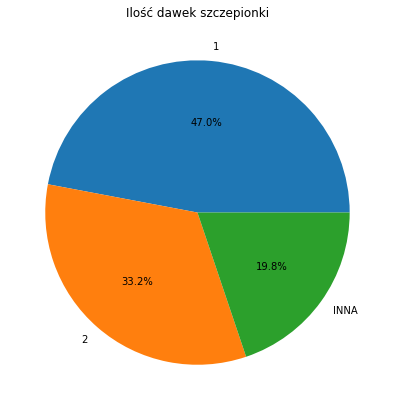

In [9]:
vax_dose_counts = data['VAX_DOSE_SERIES'].value_counts()
plt.pie(vax_dose_counts, labels=vax_dose_counts.index, autopct='%1.1f%%')
plt.title('Ilość dawek szczepionki')
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

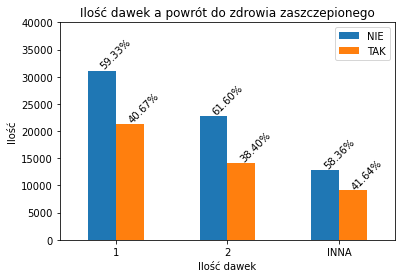

In [10]:
vax_dose_aggr= data.groupby(['VAX_DOSE_SERIES','RECOVD'])['VAX_DOSE_SERIES'].agg(Frequency='count')
vax_dose_aggr["Percentage"] = vax_dose_aggr / vax_dose_aggr.groupby(level=0).sum()
vax_dose_aggr["Percentage"] = round(vax_dose_aggr["Percentage"] * 100,2)
vax_dose_aggr = vax_dose_aggr.sort_values('RECOVD')

ax = vax_dose_aggr.Frequency.unstack().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('Ilość dawek')
plt.ylabel('Ilość')
plt.title('Ilość dawek a powrót do zdrowia zaszczepionego')
plt.legend()
axes = plt.gca()
axes.set_ylim([0,40000])

vax_dose_percentage = vax_dose_aggr["Percentage"]
vax_dose_percentage = vax_dose_percentage.tolist()
patches = ax.patches    
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   width = patches[i].get_width()
   height = patches[i].get_height()
   ax.annotate('{:.2f}%'.format(vax_dose_aggr["Percentage"][i]), (x + width/2, y + height*0.01), ha='center', rotation=45)

# VAX_ROUTE

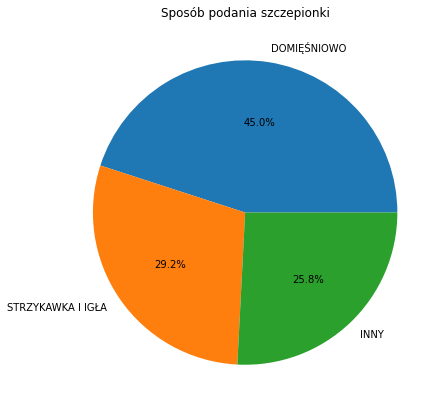

In [11]:
vax_route_counts = data['VAX_ROUTE'].value_counts()
plt.pie(vax_route_counts, labels=vax_route_counts.index, autopct='%1.1f%%')
plt.title('Sposób podania szczepionki')
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

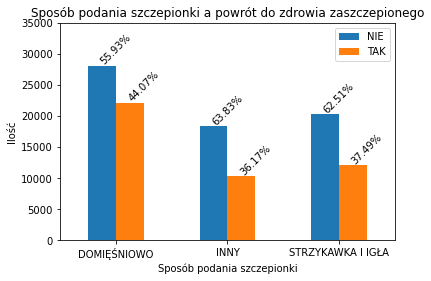

In [12]:
vax_route_aggr= data.groupby(['VAX_ROUTE','RECOVD'])['VAX_ROUTE'].agg(Frequency='count')
vax_route_aggr["Percentage"] = vax_route_aggr / vax_route_aggr.groupby(level=0).sum()
vax_route_aggr["Percentage"] = round(vax_route_aggr["Percentage"] * 100,2)
vax_route_aggr = vax_route_aggr.sort_values('RECOVD')

ax = vax_route_aggr.Frequency.unstack().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('Sposób podania szczepionki')
plt.ylabel('Ilość')
plt.title('Sposób podania szczepionki a powrót do zdrowia zaszczepionego')
plt.legend()
axes = plt.gca()
axes.set_ylim([0,35000])

vax_route_percentage = vax_route_aggr["Percentage"]
vax_route_percentage = vax_route_percentage.tolist()
patches = ax.patches    
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   width = patches[i].get_width()
   height = patches[i].get_height()
   ax.annotate('{:.2f}%'.format(vax_route_aggr["Percentage"][i]), (x + width/2, y + height*0.01), ha='center', rotation=45)

# VAX_SITE

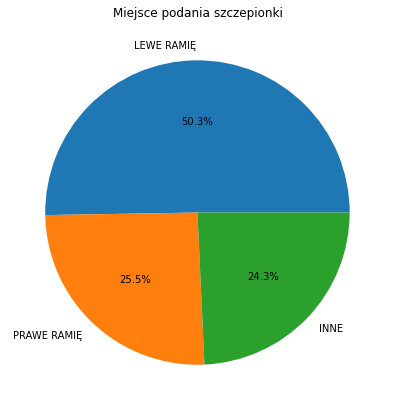

In [13]:
vax_site_counts = data['VAX_SITE'].value_counts()
plt.pie(vax_site_counts, labels=vax_site_counts.index, autopct='%1.1f%%')
plt.title('Miejsce podania szczepionki')
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

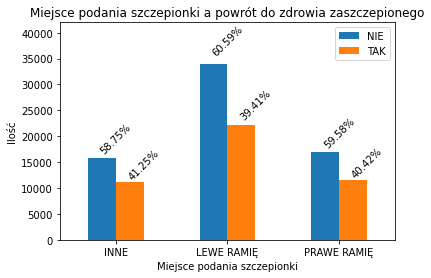

In [14]:
vax_site_aggr= data.groupby(['VAX_SITE','RECOVD'])['VAX_SITE'].agg(Frequency='count')
vax_site_aggr["Percentage"] = vax_site_aggr / vax_site_aggr.groupby(level=0).sum()
vax_site_aggr["Percentage"] = round(vax_site_aggr["Percentage"] * 100,2)
vax_site_aggr = vax_site_aggr.sort_values('RECOVD')

ax = vax_site_aggr.Frequency.unstack().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('Miejsce podania szczepionki')
plt.ylabel('Ilość')
plt.title('Miejsce podania szczepionki a powrót do zdrowia zaszczepionego')
plt.legend()
axes = plt.gca()
axes.set_ylim([0,42000])

vax_site_percentage = vax_site_aggr["Percentage"]
vax_site_percentage = vax_site_percentage.tolist()
patches = ax.patches    
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   width = patches[i].get_width()
   height = patches[i].get_height()
   ax.annotate('{:.2f}%'.format(vax_site_aggr["Percentage"][i]), (x + width/2, y + height*0.05), ha='center', rotation=45)

# AGE_YRS

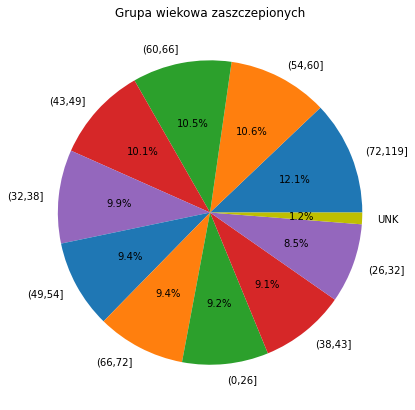

In [15]:
age_counts = data['AGE_YRS'].value_counts()
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','y']
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Grupa wiekowa zaszczepionych')
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

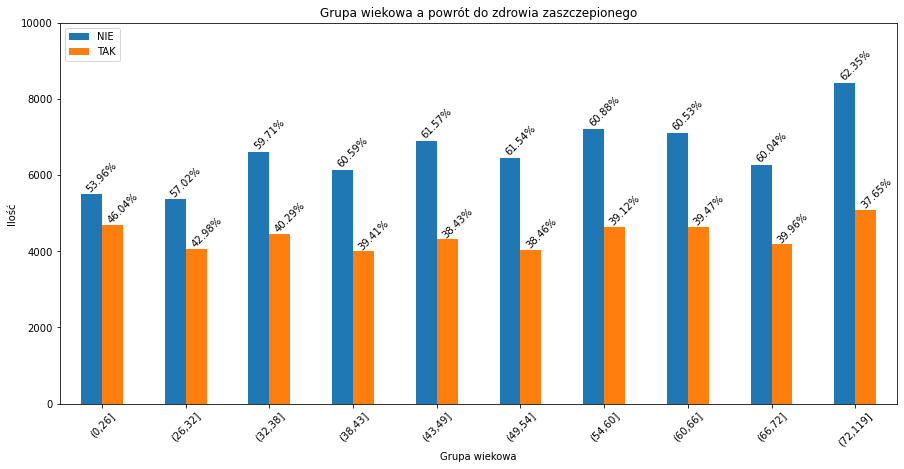

In [16]:
age_aggr = data[(data.AGE_YRS != "UNK")]
age_aggr= age_aggr.groupby(['AGE_YRS','RECOVD'])['AGE_YRS'].agg(Frequency='count')
age_aggr["Percentage"] = age_aggr / age_aggr.groupby(level=0).sum()
age_aggr["Percentage"] = round(age_aggr["Percentage"] * 100,2)
age_aggr = age_aggr.sort_values(by=['RECOVD','AGE_YRS'])

ax = age_aggr.Frequency.unstack().plot.bar()
plt.xticks(rotation=45)
plt.xlabel('Grupa wiekowa')
plt.ylabel('Ilość')
plt.title('Grupa wiekowa a powrót do zdrowia zaszczepionego')
plt.legend(loc=2)
axes = plt.gca()
axes.set_ylim([0,10000])
fig = plt.gcf()
fig.set_size_inches(15,7)

age_percentage = age_aggr["Percentage"]
age_percentage = age_percentage.tolist()
patches = ax.patches    
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   width = patches[i].get_width()
   height = patches[i].get_height()
   ax.annotate('{:.2f}%'.format(age_aggr["Percentage"][i]), (x + width/2, y + height*0.01), ha='center',rotation=45)

# SEX

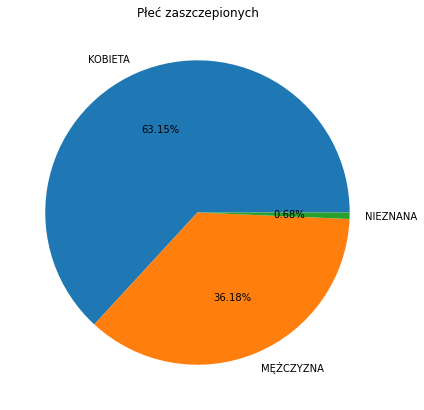

In [17]:
sex_counts = data['SEX'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.2f%%')
plt.title('Płeć zaszczepionych')
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

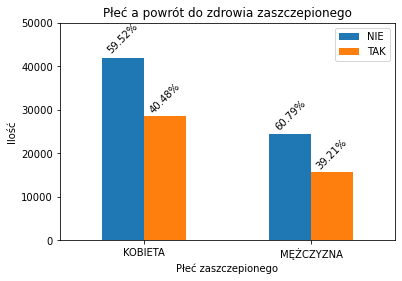

In [18]:
sex_aggr = data[(data.SEX != "NIEZNANA")]
sex_aggr= sex_aggr.groupby(['SEX','RECOVD'])['SEX'].agg(Frequency='count')
sex_aggr["Percentage"] = sex_aggr / sex_aggr.groupby(level=0).sum()
sex_aggr["Percentage"] = round(sex_aggr["Percentage"] * 100,2)
sex_aggr = sex_aggr.sort_values('RECOVD')

ax=sex_aggr.Frequency.unstack().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('Płeć zaszczepionego')
plt.ylabel('Ilość')
plt.title('Płeć a powrót do zdrowia zaszczepionego')
plt.legend()
axes = plt.gca()
axes.set_ylim([0,50000])

sex_percentage = sex_aggr["Percentage"]
sex_percentage = sex_percentage.tolist()
patches = ax.patches    
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   width = patches[i].get_width()
   height = patches[i].get_height()
   ax.annotate('{:.2f}%'.format(sex_aggr["Percentage"][i]), (x, y + height*0.03), ha='center', rotation=45)

# L_THREAT

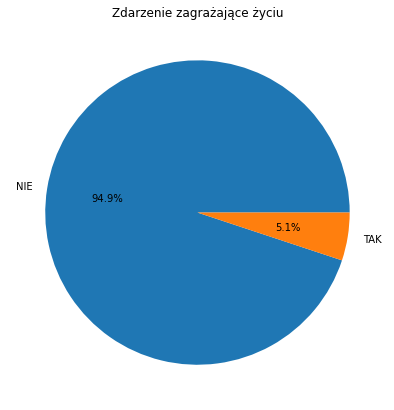

In [19]:
lthreat_counts = data['L_THREAT'].value_counts()
plt.pie(lthreat_counts, labels=lthreat_counts.index, autopct='%1.1f%%')
plt.title('Zdarzenie zagrażające życiu')
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

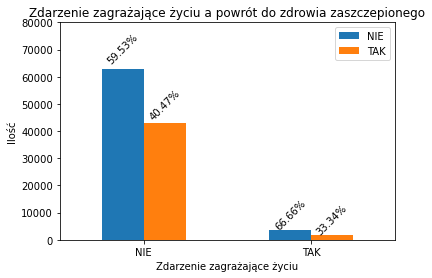

In [20]:
lthreat_aggr= data.groupby(['L_THREAT','RECOVD'])['L_THREAT'].agg(Frequency='count')
lthreat_aggr["Percentage"] = lthreat_aggr / lthreat_aggr.groupby(level=0).sum()
lthreat_aggr["Percentage"] = round(lthreat_aggr["Percentage"] * 100,2)
lthreat_aggr = lthreat_aggr.sort_values('RECOVD')

ax = lthreat_aggr.Frequency.unstack().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('Zdarzenie zagrażające życiu')
plt.ylabel('Ilość')
plt.title('Zdarzenie zagrażające życiu a powrót do zdrowia zaszczepionego')
plt.legend()
axes = plt.gca()
axes.set_ylim([0,80000])

lthreat_percentage = lthreat_aggr["Percentage"]
lthreat_percentage = lthreat_percentage.tolist()
patches = ax.patches    
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   width = patches[i].get_width()
   height = patches[i].get_height()
   ax.annotate('{:.2f}%'.format(lthreat_aggr["Percentage"][i]), (x, y + height*0.03), ha='center', rotation=45)

# HOSPITAL

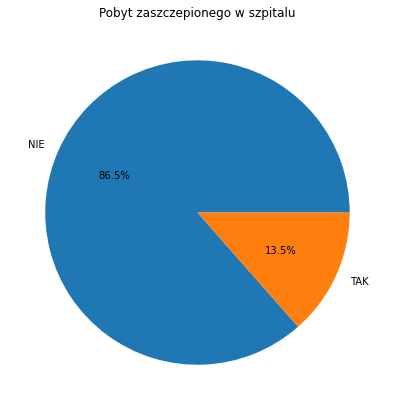

In [5]:
hospital_counts = data['HOSPITAL'].value_counts()
plt.pie(hospital_counts, labels=hospital_counts.index, autopct='%1.1f%%')
plt.title('Pobyt zaszczepionego w szpitalu')
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

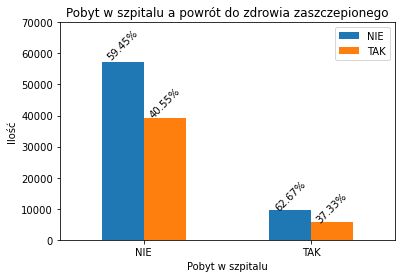

In [6]:
hospital_aggr= data.groupby(['HOSPITAL','RECOVD'])['HOSPITAL'].agg(Frequency='count')
hospital_aggr["Percentage"] = hospital_aggr / hospital_aggr.groupby(level=0).sum()
hospital_aggr["Percentage"] = round(hospital_aggr["Percentage"] * 100,2)
hospital_aggr = hospital_aggr.sort_values('RECOVD')

ax = hospital_aggr.Frequency.unstack().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('Pobyt w szpitalu')
plt.ylabel('Ilość')
plt.title('Pobyt w szpitalu a powrót do zdrowia zaszczepionego')
plt.legend()
axes = plt.gca()
axes.set_ylim([0,70000])

hospital_percentage = hospital_aggr["Percentage"]
hospital_percentage = hospital_percentage.tolist()
patches = ax.patches    
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   width = patches[i].get_width()
   height = patches[i].get_height()
   ax.annotate('{:.2f}%'.format(hospital_aggr["Percentage"][i]), (x, y + height*0.01), ha='center', rotation=45)

# HOSPDAYS

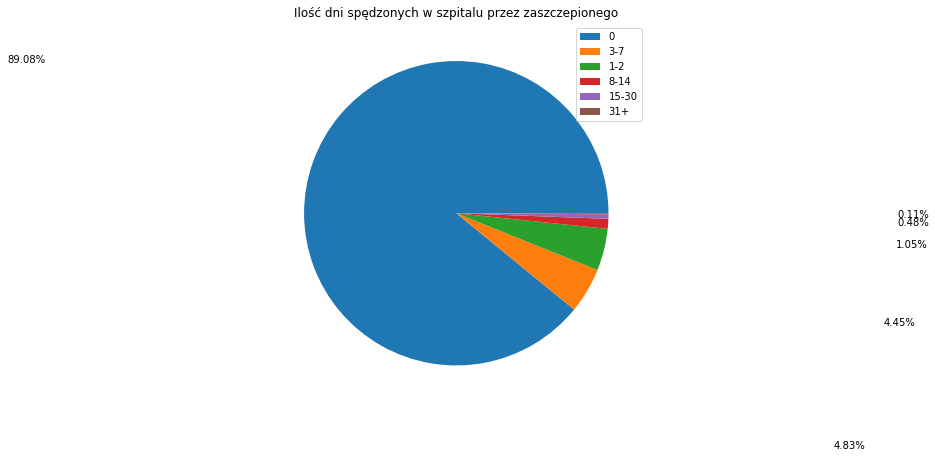

In [7]:
hospdays_counts = data['HOSPDAYS'].value_counts()
plt.pie(hospdays_counts, autopct='%1.2f%%', pctdistance=3)
plt.title('Ilość dni spędzonych w szpitalu przez zaszczepionego')
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.legend(["0","3-7","1-2","8-14","15-30","31+"])
plt.show()

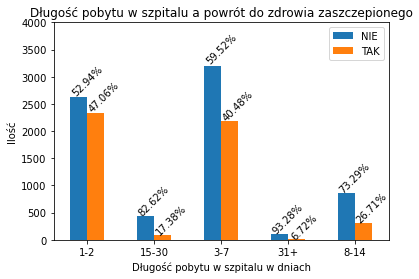

In [24]:
data_hospdays = data[data.HOSPDAYS != '0']
hospdays_aggr= data_hospdays.groupby(['HOSPDAYS','RECOVD'])['HOSPDAYS'].agg(Frequency='count')
hospdays_aggr["Percentage"] = hospdays_aggr / hospdays_aggr.groupby(level=0).sum()
hospdays_aggr["Percentage"] = round(hospdays_aggr["Percentage"] * 100,2)
hospdays_aggr = hospdays_aggr.sort_values('RECOVD')

ax = hospdays_aggr.Frequency.unstack().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('Długość pobytu w szpitalu w dniach')
plt.ylabel('Ilość')
plt.title('Długość pobytu w szpitalu a powrót do zdrowia zaszczepionego')
plt.legend()
axes = plt.gca()
axes.set_ylim([0,4000])
hospdays_percentage = hospdays_aggr["Percentage"]
hospdays_percentage = hospdays_percentage.tolist()
patches = ax.patches    
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   width = patches[i].get_width()
   height = patches[i].get_height()
   ax.annotate('{:.2f}%'.format(hospdays_aggr["Percentage"][i]), (x + width/2, y + height*0.01), ha='center', rotation=45)

# DISABLE

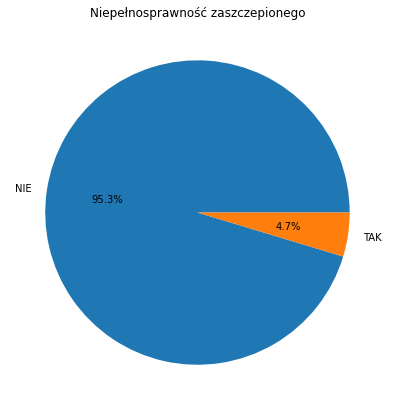

In [25]:
disable_counts = data['DISABLE'].value_counts()
plt.pie(disable_counts, labels=disable_counts.index, autopct='%1.1f%%')
plt.title('Niepełnosprawność zaszczepionego')
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

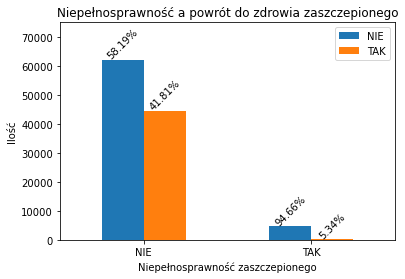

In [26]:
disable_aggr= data.groupby(['DISABLE','RECOVD'])['DISABLE'].agg(Frequency='count')
disable_aggr["Percentage"] = disable_aggr / disable_aggr.groupby(level=0).sum()
disable_aggr["Percentage"] = round(disable_aggr["Percentage"] * 100,2)
disable_aggr = disable_aggr.sort_values('RECOVD')

ax = disable_aggr.Frequency.unstack().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('Niepełnosprawność zaszczepionego')
plt.ylabel('Ilość')
plt.title('Niepełnosprawność a powrót do zdrowia zaszczepionego')
plt.legend()
axes = plt.gca()
axes.set_ylim([0,75000])
disable_percentage = disable_aggr["Percentage"]
disable_percentage = disable_percentage.tolist()
patches = ax.patches    
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   width = patches[i].get_width()
   height = patches[i].get_height()
   ax.annotate('{:.2f}%'.format(disable_aggr["Percentage"][i]), (x, y + height*0.01), ha='center', rotation=45)

# NUMDAYS

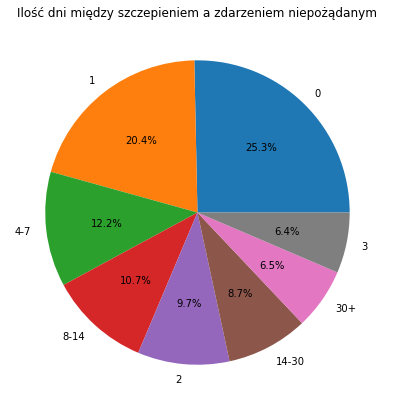

In [9]:
numdays_counts = data['NUMDAYS'].value_counts()
plt.pie(numdays_counts, labels=numdays_counts.index, autopct='%1.1f%%')
plt.title('Ilość dni między szczepieniem a zdarzeniem niepożądanym')
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

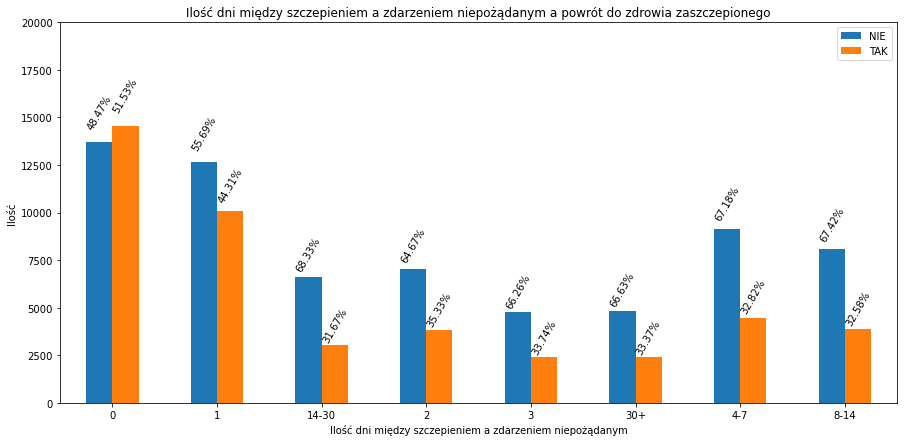

In [10]:
numdays_aggr= data.groupby(['NUMDAYS','RECOVD'])['NUMDAYS'].agg(Frequency='count')
numdays_aggr["Percentage"] = numdays_aggr / numdays_aggr.groupby(level=0).sum()
numdays_aggr["Percentage"] = round(numdays_aggr["Percentage"] * 100,2)
numdays_aggr = numdays_aggr.sort_values('RECOVD')

ax = numdays_aggr.Frequency.unstack().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('Ilość dni między szczepieniem a zdarzeniem niepożądanym')
plt.ylabel('Ilość')
plt.title(r"Ilość dni między szczepieniem a zdarzeniem niepożądanym" + "\n" + "a powrót do zdrowia zaszczepionego")
plt.legend()
axes = plt.gca()
axes.set_ylim([0,20000])
fig = plt.gcf()
fig.set_size_inches(15,7)
numdays_percentage = numdays_aggr["Percentage"]
numdays_percentage = numdays_percentage.tolist()
patches = ax.patches    
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   width = patches[i].get_width()
   height = patches[i].get_height()
   ax.annotate('{:.2f}%'.format(numdays_aggr["Percentage"][i]), (x, y + height*0.05), ha='center', rotation=60)

# V_ADMINBY

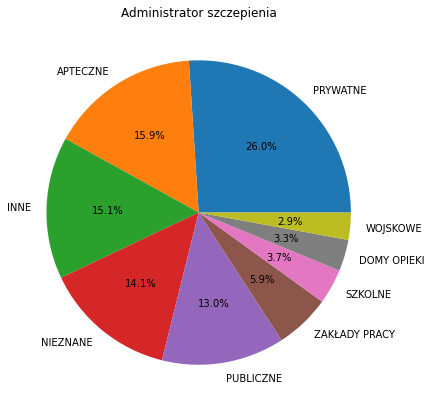

In [29]:
vadminby_counts = data['V_ADMINBY'].value_counts()
plt.pie(vadminby_counts, labels=vadminby_counts.index, autopct='%1.1f%%')
plt.title('Administrator szczepienia')
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

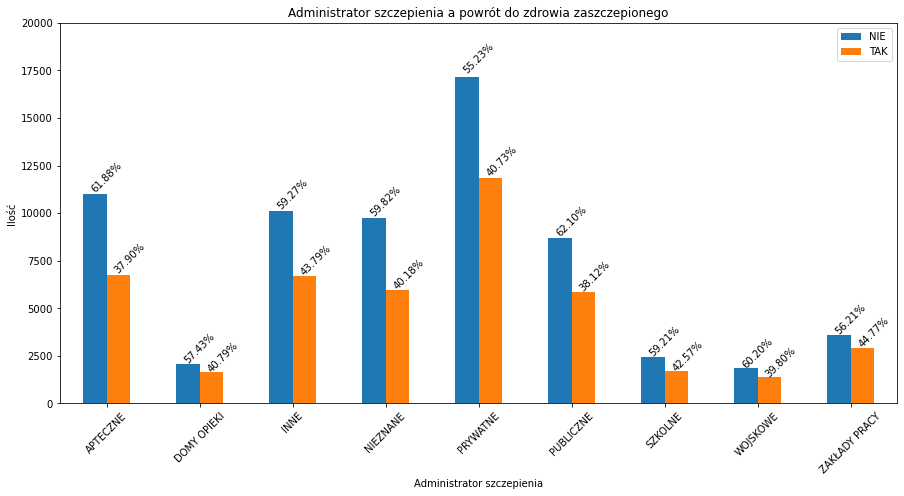

In [8]:
vadminby_aggr= data.groupby(['V_ADMINBY','RECOVD'])['V_ADMINBY'].agg(Frequency='count')
vadminby_aggr["Percentage"] = vadminby_aggr / vadminby_aggr.groupby(level=0).sum()
vadminby_aggr["Percentage"] = round(vadminby_aggr["Percentage"] * 100,2)
vadminby_aggr = vadminby_aggr.sort_values('RECOVD')

ax = vadminby_aggr.Frequency.unstack().plot.bar()
plt.xticks(rotation=45)
plt.xlabel('Administrator szczepienia')
plt.ylabel('Ilość')
plt.title("Administrator szczepienia a powrót do zdrowia zaszczepionego")
plt.legend()
axes = plt.gca()
axes.set_ylim([0,20000])
fig = plt.gcf()
fig.set_size_inches(15,7)
vadminby_percentage = vadminby_aggr["Percentage"]
vadminby_percentage = vadminby_percentage.tolist()
patches = ax.patches    
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   width = patches[i].get_width()
   height = patches[i].get_height()
   ax.annotate('{:.2f}%'.format(vadminby_aggr["Percentage"][i]), (x + width/2, y + height*0.01), ha='center', rotation=45)

# OFC_VISIT

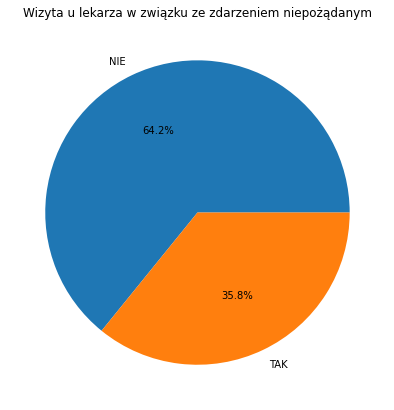

In [31]:
ofcvisit_counts = data['OFC_VISIT'].value_counts()
plt.pie(ofcvisit_counts, labels=ofcvisit_counts.index, autopct='%1.1f%%')
plt.title('Wizyta u lekarza w związku ze zdarzeniem niepożądanym')
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

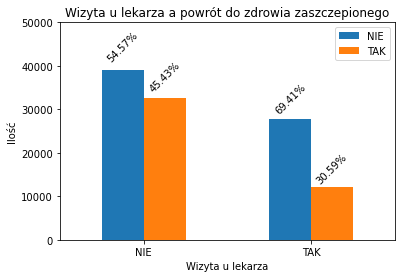

In [32]:
ofcvisit_aggr= data.groupby(['OFC_VISIT','RECOVD'])['OFC_VISIT'].agg(Frequency='count')
ofcvisit_aggr["Percentage"] = ofcvisit_aggr / ofcvisit_aggr.groupby(level=0).sum()
ofcvisit_aggr["Percentage"] = round(ofcvisit_aggr["Percentage"] * 100,2)
ofcvisit_aggr = ofcvisit_aggr.sort_values('RECOVD')

ax = ofcvisit_aggr.Frequency.unstack().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('Wizyta u lekarza')
plt.ylabel('Ilość')
plt.title("Wizyta u lekarza a powrót do zdrowia zaszczepionego")
plt.legend()
axes = plt.gca()
axes.set_ylim([0,50000])
ofcvisit_percentage = ofcvisit_aggr["Percentage"]
ofcvisit_percentage = ofcvisit_percentage.tolist()
patches = ax.patches    
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   width = patches[i].get_width()
   height = patches[i].get_height()
   ax.annotate('{:.2f}%'.format(ofcvisit_aggr["Percentage"][i]), (x, y + height*0.05), ha='center', rotation=45)

# ER_ED_VISIT

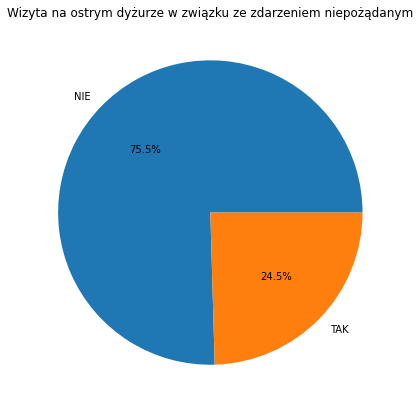

In [33]:
eredvisit_counts = data['ER_ED_VISIT'].value_counts()
plt.pie(eredvisit_counts, labels=eredvisit_counts.index, autopct='%1.1f%%')
plt.title('Wizyta na ostrym dyżurze w związku ze zdarzeniem niepożądanym')
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

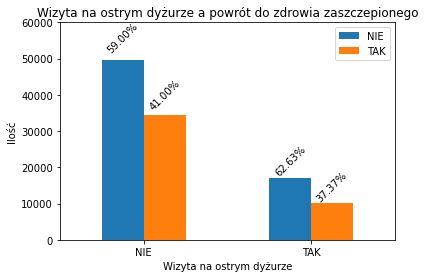

In [34]:
eredvisit_aggr= data.groupby(['ER_ED_VISIT','RECOVD'])['ER_ED_VISIT'].agg(Frequency='count')
eredvisit_aggr["Percentage"] = eredvisit_aggr / eredvisit_aggr.groupby(level=0).sum()
eredvisit_aggr["Percentage"] = round(eredvisit_aggr["Percentage"] * 100,2)
eredvisit_aggr = eredvisit_aggr.sort_values('RECOVD')

ax = eredvisit_aggr.Frequency.unstack().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('Wizyta na ostrym dyżurze')
plt.ylabel('Ilość')
plt.title("Wizyta na ostrym dyżurze a powrót do zdrowia zaszczepionego")
plt.legend()
axes = plt.gca()
axes.set_ylim([0,60000])
eredvisit_percentage = eredvisit_aggr["Percentage"]
eredvisit_percentage = eredvisit_percentage.tolist()
patches = ax.patches    
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   width = patches[i].get_width()
   height = patches[i].get_height()
   ax.annotate('{:.2f}%'.format(eredvisit_aggr["Percentage"][i]), (x, y + height*0.04), ha='center', rotation=45)